<a href="https://colab.research.google.com/github/hy05sprsea/KIKAGAKU-Tutorial/blob/master/KIKAGAKU_%E3%83%8B%E3%83%A5%E3%83%BC%E3%83%A9%E3%83%AB%E3%83%8D%E3%83%83%E3%83%88%E3%83%AF%E3%83%BC%E3%82%AF%E3%81%AE%E5%AE%9F%E8%A3%85(%E5%9B%9E%E5%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# データセットの準備
dataset = tf.keras.datasets.boston_housing
train, test = dataset.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
train

(array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.96900e+02, 1.87200e+01],
        [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
         3.95380e+02, 3.11000e+00],
        [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.75520e+02, 3.26000e+00],
        ...,
        [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
         3.62250e+02, 7.83000e+00],
        [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
         2.61950e+02, 1.57900e+01],
        [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
         3.76700e+02, 4.38000e+00]]),
 array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
        17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
        32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
        23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
        12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
   

In [7]:
train[0].shape, test[0].shape

((404, 13), (102, 13))

In [9]:
# 学習用データセット
x_train = np.array(train[0], np.float32)
t_train = np.array(train[1], np.int32)

# テスト用データセット
x_test = np.array(test[0], np.float32)
t_test = np.array(test[1], np.uint32)

In [10]:
x_train.dtype, x_train.shape

(dtype('float32'), (404, 13))

In [11]:
x_test.dtype, x_test.shape


(dtype('float32'), (102, 13))

In [12]:
import os, random

def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [15]:
reset_seed(0)

# モデルの定義
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(32, activation='relu', input_shape=(13, )),
                                    tf.keras.layers.Dense(1),
])

# モデルのコンパイル
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae'])

In [16]:
# モデル構造の確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


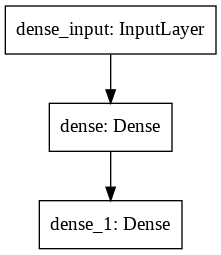

In [17]:
# モデル構造の可視化
tf.keras.utils.plot_model(model)

In [18]:
# モデルの学習
history = model.fit(x_train, t_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(x_test, t_test))

Epoch 1/30
13/13 [==============================] - 0s 14ms/step - loss: 21222.6855 - mae: 138.6180 - val_loss: 13315.3262 - val_mae: 108.2218
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 8216.6748 - mae: 82.8000 - val_loss: 4070.0105 - val_mae: 55.7379
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 2241.2576 - mae: 39.3423 - val_loss: 985.7280 - val_mae: 25.3244
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 606.8349 - mae: 20.6313 - val_loss: 499.1851 - val_mae: 19.3275
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 440.2765 - mae: 17.9603 - val_loss: 451.2462 - val_mae: 17.8600
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 382.6569 - mae: 16.4839 - val_loss: 366.1032 - val_mae: 16.0113
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 305.7506 - mae: 14.8693 - val_loss: 290.7780 - val_mae: 14.2709
Epoch 8/30
13/13 [====================

In [19]:
# 学習済みモデルの評価
score = model.evaluate(x_test, t_test)
score

4/4 [==============================] - 0s 2ms/step - loss: 62.3125 - mae: 6.1154


[62.312461853027344, 6.115375995635986]

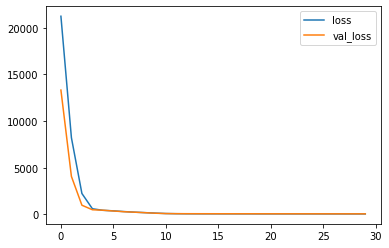

In [20]:
# 結果の可視化
result = pd.DataFrame(history.history)

# 目的関数の可視化
result[['loss', 'val_loss']].plot();

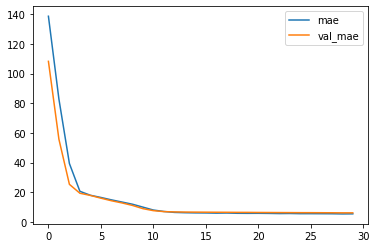

In [22]:
# 評価指標の可視化
result[['mae', 'val_mae']].plot();